In [1]:
import pandas

In [429]:
def get_signal(subject_id, run, mask):
    subject_id = '%02d' % int(subject_id)
    run = '%02d' % int(run)    
    run0 = int(run) - 1
    
    signal = np.loadtxt('/home/gdholla1/projects/bias/data/derivatives/extracted_signal/highpassed_motion/_mask_{mask}_subject_id_{subject_id}/_extracter_highpassed_motion{run0}/sub-{subject_id}_task-randomdotmotion_run-{run}_bold_unwarped_st_dtype_mcf_mask_gms_tempfilt_regfilt_maths_ts.txt'.format(**locals()))
    
    signal = (signal / signal.mean()) * 100
    signal -= signal.mean()
    
    return signal

def get_onsets(subject_id, run, design='model0', shift=0):

    df = pandas.read_pickle('/home/gdholla1/projects/bias/data/behavior/behavior.pandas')
    df = df[(df.subj_idx == subject_id) & (df.block == run)]

    df['onset_cue'] += shift
    df['onset_stim'] += shift
    
    
    if design == 'model0':
        onsets_cue = df.onset_cue.tolist()
        onsets_stim = df.onset_stim.tolist()

        conditions=['onsets_cue',
                    'onsets_stim',]
        
        onsets=[onsets_cue,
                onsets_stim]
        
    elif design == 'model1a':
        conditions=['payoff cue',
                    'neutral cue',
                    'easy',
                    'hard']
        
        onsets=[df[df.cue != 'neutral'].onset_cue.tolist(),
                df[df.cue == 'neutral'].onset_cue.tolist(),
                df[df.difficulty == 'easy'].onset_stim.tolist(),
                df[df.difficulty == 'hard'].onset_stim.tolist()]
        
    elif design == 'model1b':
        conditions= ['left', 'right', 'neutral', 'easy', 'hard']
        
        onsets=[df[df.cue == 'left'].onset_cue.tolist(),
                df[df.cue == 'right'].onset_cue.tolist(),                
                df[df.cue == 'neutral'].onset_cue.tolist(),
                df[df.difficulty == 'easy'].onset_stim.tolist(),
                df[df.difficulty == 'hard'].onset_stim.tolist()]        
        
        
    elif design == 'model1c':
        conditions=['payoff_cue',
                    'neutral_cue',
                    'easy (correct)',
                    'hard (correct)',
                    'easy (error)',
                    'hard (error)']
        
        onsets=[df[df.cue != 'neutral'].onset_cue.tolist(),
                df[df.cue == 'neutral'].onset_cue.tolist(),
                df[(df.difficulty == 'easy') & (df.correct == 1)].onset_stim.tolist(),
                df[(df.difficulty == 'hard') & (df.correct == 1)].onset_stim.tolist(),
                df[(df.difficulty == 'easy') & (df.correct == 0)].onset_stim.tolist(),
                df[(df.difficulty == 'hard') & (df.correct == 0)].onset_stim.tolist()]        
        
    elif design == 'model1d':
        conditions=['payoff_cue',
                    'neutral_cue',
                    'easy',
                    'hard',
                    'correct',
                    'error']
        
        onsets=[df[df.cue != 'neutral'].onset_cue.tolist(),
                df[df.cue == 'neutral'].onset_cue.tolist(),
                df[(df.difficulty == 'easy')].onset_stim.tolist(),
                df[(df.difficulty == 'hard')].onset_stim.tolist(),
                df[(df.correct == 1)].onset_stim.tolist(),
                df[(df.correct == 0)].onset_stim.tolist()]
        
    
    elif design == 'model2':
        conditions=['payoff_cue',
                    'neutral_cue',
                    'correct (congruent)',
                    'correct (neutral)',
                    'correct (incongruent)',
                    'error (congruent)',
                    'error (neutral)',
                    'error (incongruent)']   
        
        onsets=[df[df.cue != 'neutral'].onset_cue.tolist(),
                df[df.cue == 'neutral'].onset_cue.tolist(),
                df[(df.cue_validity == 'valid') & (df.correct == 1)].onset_stim.tolist(),
                df[(df.cue_validity == 'neutral') & (df.correct == 1)].onset_stim.tolist(),
                df[(df.cue_validity == 'invalid') & (df.correct == 1)].onset_stim.tolist(),
                df[(df.cue_validity == 'valid') & (df.correct == 0)].onset_stim.tolist(),
                df[(df.cue_validity == 'neutral') & (df.correct == 0)].onset_stim.tolist(),
                df[(df.cue_validity == 'invalid') & (df.correct == 0)].onset_stim.tolist()]
        
        
    elif design == 'model3':
        conditions=['payoff_cue',
                    'neutral_cue',                    
                    'left response',
                    'right response']
        
        onsets=[df[df.cue != 'neutral'].onset_cue.tolist(),
                df[df.cue == 'neutral'].onset_cue.tolist(),
                df[df.response == 1].onset_stim.tolist(),
                df[df.response == 2].onset_stim.tolist()]        
        
        
    elif design == 'model4':
        
        onsets_neutral_cue_correct = df[(df.cue_validity == 'neutral') & (df.correct == 1)].onset_stim.tolist()
        onsets_neutral_cue_error = df[(df.cue_validity == 'neutral') & (df.correct == 0)].onset_stim.tolist()
        
        onsets_valid_cue_correct = df[(df.cue_validity == 'valid') & (df.correct == 1)].onset_stim.tolist()
        onsets_valid_cue_error = df[(df.cue_validity == 'valid') & (df.correct == 0)].onset_stim.tolist()        
        
        onsets_invalid_cue_correct = df[(df.cue_validity == 'invalid') & (df.correct == 1)].onset_stim.tolist()
        onsets_invalid_cue_error = df[(df.cue_validity == 'invalid') & (df.correct == 0)].onset_stim.tolist()                

        
        conditions=['payoff_cue',
                    'neutral_cue',
                    'valid (correct)',
                    'valid (error)',
                    'neutral (correct)',
                    'neutral (error)',
                    'invalid (correct)',
                    'invalid (error)']
        
        onsets=[df[df.cue != 'neutral'].onset_cue.tolist(),
                df[df.cue == 'neutral'].onset_cue.tolist(),
                onsets_valid_cue_correct,
                onsets_valid_cue_error,
                onsets_neutral_cue_correct,
                onsets_neutral_cue_error,
                onsets_invalid_cue_correct,
                onsets_invalid_cue_error]                
    
    return dict(zip(conditions, onsets))

In [321]:
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# Model 1a

In [481]:
import itertools
import pyfir
from nipy.modalities.fmri import design_matrix, experimental_paradigm
import statsmodels.api as sm

level2_dict = []
adj_r = []
# pars = ['neutral_cue', 'left_cue', 'right_cue', 'neutral_easy_correct', 'valid_easy_correct', 'invalid_easy_correct', 'neutral_hard_correct', 'valid_hard_correct', 'invalid_hard_correct', 'easy_error', 'hard_error',]
# pars = 

for subject_id in np.arange(1, 20):
    for run in [1,2,3]:

        try:
            onsets_dict = get_onsets(subject_id, run, 'model1a', shift=-3)
            pars = onsets_dict.keys()

            conditions = []
            onsets = []
            for key in onsets_dict.keys():
                conditions += [key] * len(onsets_dict[key])
                onsets += onsets_dict[key]

            paradigm =  experimental_paradigm.BlockParadigm(con_id=conditions, 
                                                            onset=onsets,
                                                            duration=[[1.]] * len(conditions))
            tr = 3.0
            frametimes = np.linspace(0, 387 * tr, 387)
            hrf_model = 'Canonical with Derivative'

            X, names= design_matrix.dmtx_light(frametimes, paradigm, hrf_model=hrf_model, drift_model='polynomial', fir_delays=np.arange(11), drift_order=3)

            X /= X.max(0)
            X = pandas.DataFrame(X, columns=names)

            for i, mask in enumerate(['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']):
                signal = get_signal(subject_id,  run, mask)
                r = sm.GLSAR(signal, X).iterative_fit()

                adj_r.append({'subject_id':subject_id, 'mask':mask, 'r2_adj':r.rsquared_adj, 'r2':r.rsquared, 'run':run})

                for par in pars:
                    level2_dict.append({'value':r.params[par],
                                        'par':par,
                                        'subject_id':subject_id,
                                        'mask':mask,
                                        'run':run})
        except Exception as e:
            print 'Error: %s/%s/%s' %  (subject_id, mask, e)

Error: 6/STh_R_C/all the input arrays must have same number of dimensions


The first set of analyses tested whether there were significant differences in the BOLD response between task conditions. Therefore, a set of general linear models (GLM) were fit to the extracted STN segment time series. The first model (GLM1a) contained the following task condition regressors: (a) neutral cue, (b) payoff cue, (c) easy RDM stimulus, (d) hard RDM stimulus. Its first main contrast of interest was ‘payoff cue > neutral cue’ (and neutral cue > payoff cue), to see whether any segments were involved in processing the cue information. The other main contrast was ‘hard RDM stimulus > easy RDM stimulus’ (and ‘easy RDM stimulus > hard RDM stimulus’), which should indicate areas that were related to the speed of evidence accumulation. 


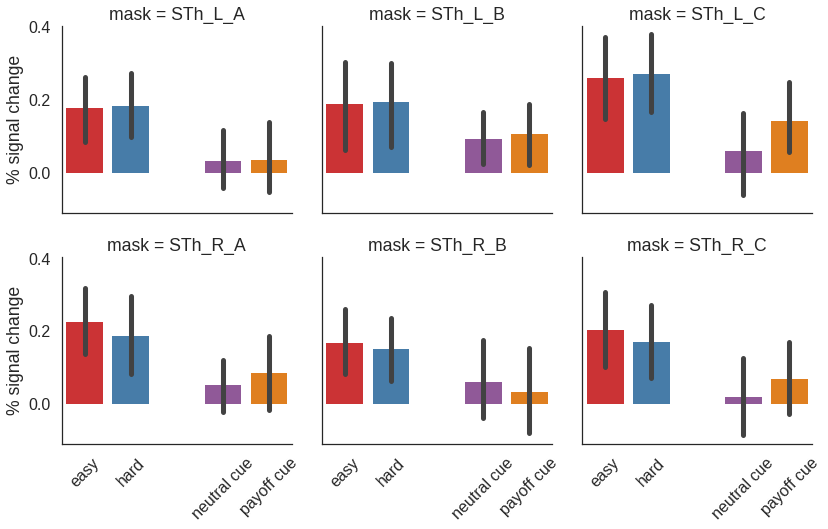

In [483]:
df_glm = pandas.DataFrame(level2_dict)
df_glm = df_glm.query('par != "constant"')
df_glm['dummy'] = 1

df_glm['% signal change'] = df_glm['value']
sns.set_palette('Set1')
sns.set_context('poster')
sns.set_style('white')

# sns.factorplot(x='dummy', y='value', hue='par', data=df_glm, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['payoff_cue (left)', 'payoff_cue (right)', 'neutral_cue','difficult_rdm', 'easy_rdm'])

tmp = df_glm.groupby(['subject_id', 'mask', 'par', 'dummy'], as_index=False).mean()
fac = sns.factorplot(x='par', y='% signal change', data=tmp, col='mask', col_wrap=3, kind='bar', ci=95, x_order=['easy', 'hard', '', 'neutral cue', 'payoff cue'])

fac.set_xticklabels(rotation=45)

plt.tight_layout()

fac.set_xlabels('')

plt.savefig('/home/gdholla1/projects/bias/reports/figures/figure2.pdf')

### Payoff cue > neutral cue

In [370]:
masks = ['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']

results = []

for mask in masks:
    df_mask = df_glm[df_glm['mask'] == mask].pivot_table(index='subject_id', values='value', columns='par')
    
    
    print '***** %s ******' % mask
    %R -i df_mask
    %R library(BayesFactor)
    %R bf = ttestBF(df_mask$payoff.cue - df_mask$neutral.cue)
    %R tmp = extractBF(bf)
    %R -o tmp
    
    t, p = sp.stats.ttest_rel(df_mask['payoff cue'], df_mask['neutral cue'])
    
    results.append({'mask':mask,
                    'BF':tmp.bf.values[0],
                    't':t,
                    'p':p})
    
np.round(pandas.DataFrame(results)[['mask', 'BF', 't', 'p']], 2).T

***** STh_L_A ******
***** STh_L_B ******
***** STh_L_C ******
***** STh_R_A ******
***** STh_R_B ******
***** STh_R_C ******


,0,1,2,3,4,5
mask,STh_L_A,STh_L_B,STh_L_C,STh_R_A,STh_R_B,STh_R_C
BF,0.24,0.25,1.73,0.29,0.32,0.87
t,0.05,0.38,2.23,0.67,-0.83,1.76
p,0.96,0.71,0.04,0.51,0.42,0.09


In [381]:
tmp = df_glm.pivot_table(index='subject_id', values='value', columns=['par', 'mask'])
tmp = tmp['payoff cue'] - tmp['neutral cue']
tmp = pandas.melt(tmp.reset_index(), id_vars=['subject_id'])

In [394]:
tmp = df_glm.pivot_table(index='subject_id', values='value', columns=['par', 'mask'])
tmp = tmp['payoff cue'] - tmp['neutral cue']
tmp = pandas.melt(tmp.reset_index(), id_vars=['subject_id'])
tmp['subject_id'] = tmp.subject_id.astype('category')

tmp_l = tmp[np.in1d(tmp['mask'], ['STh_L_A', 'STh_L_B', 'STh_L_C'])]
%R -i tmp_l
%R bf = anovaBF(value ~ mask + subject_id, data=tmp_l,  whichRandom="subject_id")
# %R bf = anovaBF(value ~ mask , data=tmp_l,  iterations=10000)
%R print(bf)

tmp_r = tmp[np.in1d(tmp['mask'], ['STh_R_A', 'STh_R_B', 'STh_R_C'])]
%R -i tmp_r
%R bf = anovaBF(value ~ mask + subject_id, data=tmp_r,  whichRandom="subject_id")
# %R bf = anovaBF(value ~ mask , data=tmp_l,  iterations=10000)
%R print(bf)

  |======================================================================| 100%


Bayes factor analysis
--------------
[1] mask + subject_id : 0.4662471 ±1.07%

Against denominator:
  value ~ subject_id 
---
Bayes factor type: BFlinearModel, JZS



  |======================================================================| 100%


Bayes factor analysis
--------------
[1] mask + subject_id : 0.5316568 ±1.15%

Against denominator:
  value ~ subject_id 
---
Bayes factor type: BFlinearModel, JZS



Bayes factor analysis
--------------
[1] Alt., r=0.707 : 0.5699204 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS



Bayes factor analysis
--------------
[1] Alt., r=0.707 : 0.6650064 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS



Bayes factor analysis
--------------
[1] Alt., r=0.707 : 0.3533708 ±0.01%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS



Bayes factor analysis
--------------
[1] Alt., r=0.707 : 2.803351 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS



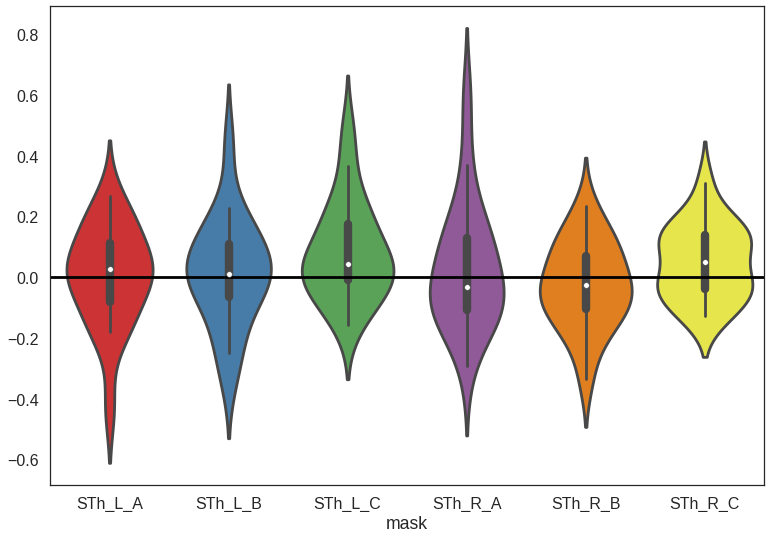

In [314]:
tmp = df_glm.pivot_table(index='subject_id', values='value', columns=['par', 'mask'])
tmp = tmp['payoff cue'] - tmp['neutral cue']

sns.violinplot(tmp)
plt.axhline(0, c='k')

%R -i tmp
%R bf = ttestBF(tmp$STh_L_A - tmp$STh_L_C)
%R print(bf)
%R bf = ttestBF(tmp$STh_L_B - tmp$STh_L_C)
%R print(bf)
%R bf = ttestBF(tmp$STh_R_A - tmp$STh_L_C)
%R print(bf)
%R bf = ttestBF(tmp$STh_R_B - tmp$STh_L_C)
%R print(bf)

In [ ]:
%%R -i tmp


bf = anovaBF(cue_effect ~ STh_R_A + STh_R_B  + STh_R_C + subject_id, data=tmp,  whichRandom="subject_id")
print(bf)

# Difficulty > Easy

In [345]:
masks = ['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']

results = []

for mask in masks:
    df_mask = df_glm[df_glm['mask'] == mask].pivot_table(index='subject_id', values='value', columns='par')
    
    
    print '***** %s ******' % mask
    %R -i df_mask
    %R library(BayesFactor)
    %R bf = ttestBF(df_mask$easy - df_mask$hard)
    %R tmp = extractBF(bf)
    %R -o tmp
    
    t, p = sp.stats.ttest_rel(df_mask['easy'], df_mask['hard'])
    
    results.append({'mask':mask,
                    'BF':tmp.bf.values[0],
                     't':t,
                    'p':p})
    
np.round(pandas.DataFrame(results)[['mask', 'BF', 'p']], 2).T

***** STh_L_A ******
***** STh_L_B ******
***** STh_L_C ******
***** STh_R_A ******
***** STh_R_B ******
***** STh_R_C ******


,0,1,2,3,4,5
mask,STh_L_A,STh_L_B,STh_L_C,STh_R_A,STh_R_B,STh_R_C
BF,0.25,0.24,0.25,0.54,0.3,0.33
p,0.79,0.82,0.76,0.18,0.49,0.4


In [73]:
tmp

,bf,error,time,code
"Alt., r=0.707",7.90203,0.000009,Fri Mar 10 14:19:35 2017,6d962c29e716


In [78]:
masks = ['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']

results = []

for mask in masks:
    df = df_glm[df_glm['mask'] == mask].pivot_table(index='subject_id', values='value', columns='par')
    
    for par in df.columns:
        print '***** %s / %s ******' % (mask, par)
        %R -i df -i par
        %R library(BayesFactor)
        %R bf = ttestBF(df[,par])
        %R tmp = extractBF(bf)
        %R -o tmp

        results.append({'mask':mask,
                        'BF':tmp.bf.values[0],
                        'par':par})
    
pandas.DataFrame(results).pivot_table(index='mask', columns='par', values='BF')

***** STh_L_A / difficult_rdm ******
***** STh_L_A / easy_rdm ******
***** STh_L_A / neutral_cue ******
***** STh_L_A / payoff_cue ******
***** STh_L_B / difficult_rdm ******
***** STh_L_B / easy_rdm ******
***** STh_L_B / neutral_cue ******
***** STh_L_B / payoff_cue ******
***** STh_L_C / difficult_rdm ******
***** STh_L_C / easy_rdm ******
***** STh_L_C / neutral_cue ******
***** STh_L_C / payoff_cue ******
***** STh_R_A / difficult_rdm ******
***** STh_R_A / easy_rdm ******
***** STh_R_A / neutral_cue ******
***** STh_R_A / payoff_cue ******
***** STh_R_B / difficult_rdm ******
***** STh_R_B / easy_rdm ******
***** STh_R_B / neutral_cue ******
***** STh_R_B / payoff_cue ******
***** STh_R_C / difficult_rdm ******
***** STh_R_C / easy_rdm ******
***** STh_R_C / neutral_cue ******
***** STh_R_C / payoff_cue ******


par,difficult_rdm,easy_rdm,neutral_cue,payoff_cue
mask,,,,
STh_L_A,26.876881,44.206139,0.312905,0.293993
STh_L_B,6.402477,10.544420,2.492586,2.321158
STh_L_C,59.659987,238.012533,0.368160,3.293387
STh_R_A,237.734524,10.802724,0.501640,0.608280
STh_R_B,18.692930,10.515074,0.413749,0.275766
STh_R_C,26.207962,7.902030,0.247538,0.452727


# Model 1b

In [346]:
import itertools
import pyfir
from nipy.modalities.fmri import design_matrix, experimental_paradigm
import statsmodels.api as sm

level2_dict = []
adj_r = []
# pars = ['neutral_cue', 'left_cue', 'right_cue', 'neutral_easy_correct', 'valid_easy_correct', 'invalid_easy_correct', 'neutral_hard_correct', 'valid_hard_correct', 'invalid_hard_correct', 'easy_error', 'hard_error',]
# pars = 

for subject_id in np.arange(1, 20):
    for run in [1,2,3]:

        try:
            onsets_dict = get_onsets(subject_id, run, 'model1b', shift=-3)
            pars = onsets_dict.keys()

            conditions = []
            onsets = []
            for key in onsets_dict.keys():
                conditions += [key] * len(onsets_dict[key])
                onsets += onsets_dict[key]

            paradigm =  experimental_paradigm.BlockParadigm(con_id=conditions, 
                                                            onset=onsets,
                                                            duration=[[1.]] * len(conditions))
            tr = 3.0
            frametimes = np.linspace(0, 387 * tr, 387)
            hrf_model = 'Canonical with Derivative'

            X, names= design_matrix.dmtx_light(frametimes, paradigm, hrf_model=hrf_model, drift_model='polynomial', fir_delays=np.arange(11), drift_order=3)

            X /= X.max(0)
            X = pandas.DataFrame(X, columns=names)

            for i, mask in enumerate(['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']):
                signal = get_signal(subject_id,  run, mask)
                r = sm.GLSAR(signal, X).iterative_fit()

                adj_r.append({'subject_id':subject_id, 'mask':mask, 'r2_adj':r.rsquared_adj, 'r2':r.rsquared, 'run':run})

                for par in pars:
                    level2_dict.append({'value':r.params[par],
                                        'par':par,
                                        'subject_id':subject_id,
                                        'mask':mask,
                                        'run':run})
        except Exception as e:
            print 'Error: %s/%s/%s' %  (subject_id, mask, e)

Error: 6/STh_R_C/all the input arrays must have same number of dimensions


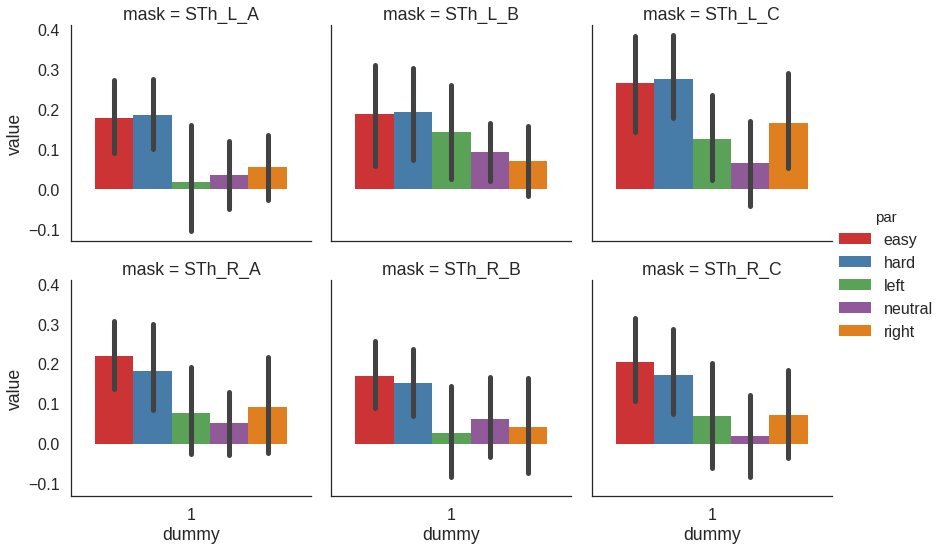

In [347]:
df_glm = pandas.DataFrame(level2_dict)
df_glm = df_glm.query('par != "constant"')
df_glm['dummy'] = 1

df_glm['% signal change'] = df_glm['value']
sns.set_palette('Set1')
sns.set_context('poster')
sns.set_style('white')

# sns.factorplot(x='dummy', y='value', hue='par', data=df_glm, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['payoff_cue (left)', 'payoff_cue (right)', 'neutral_cue','difficult_rdm', 'easy_rdm'])

tmp = df_glm.groupby(['subject_id', 'mask', 'par', 'dummy'], as_index=False).mean()
sns.factorplot(x='dummy', y='value', hue='par', data=tmp, col='mask', col_wrap=3, kind='bar', ci=95)

In [349]:
masks = ['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']

results = []

for mask in masks:
    df_mask = df_glm[df_glm['mask'] == mask].pivot_table(index='subject_id', values='value', columns='par')
    
    
    print '***** %s ******' % mask
    %R -i df_mask
    %R library(BayesFactor)
    %R bf = ttestBF(df_mask$left - df_mask$right)
    %R tmp = extractBF(bf)
    %R -o tmp
    
    t, p = sp.stats.ttest_rel(df_mask['left'], df_mask['right'])
    
    results.append({'mask':mask,
                    'BF':tmp.bf.values[0],
                     't':t,
                    'p':p})
    
np.round(pandas.DataFrame(results)[['mask', 'BF', 'p']], 2).T

***** STh_L_A ******
***** STh_L_B ******
***** STh_L_C ******
***** STh_R_A ******
***** STh_R_B ******
***** STh_R_C ******


,0,1,2,3,4,5
mask,STh_L_A,STh_L_B,STh_L_C,STh_R_A,STh_R_B,STh_R_C
BF,0.29,0.43,0.3,0.25,0.25,0.24
p,0.51,0.26,0.48,0.7,0.72,0.96


# Model 1c


It is well-known that especially limbic structures show highly heightened activity after an error has been made {Alexander:2011js}. Therefore, “drift-rate”-related activity in limbic areas such as the Insula {Mulder:2014ho, Keuken:2014iz} might just be a result of a larger number of errors in trials with a lower drift rate. To test this hypothesis, we fitted a third variant of the GLM (GLM 1c), that deconfounded the task difficulty from error trials. It included the following regressors: (a) neutral cue, (b) payoff cue, (d) easy RDM stimulus (correct), (e) easy RDM stimulus (error), (f) hard RDM stimulus (correct), (g) hard RDM stimulus (error). The main contrast-of-interest for this GLM was ‘hard RDM stimulus (correct) > easy RDM stimulus (correct)’.


In [484]:
import itertools
import pyfir
from nipy.modalities.fmri import design_matrix, experimental_paradigm
import statsmodels.api as sm

level2_dict = []
adj_r = []
# pars = ['neutral_cue', 'left_cue', 'right_cue', 'neutral_easy_correct', 'valid_easy_correct', 'invalid_easy_correct', 'neutral_hard_correct', 'valid_hard_correct', 'invalid_hard_correct', 'easy_error', 'hard_error',]
# pars = 

for subject_id in np.arange(1, 20):
    for run in [1,2,3]:

        try:
            onsets_dict = get_onsets(subject_id, run, 'model1c', shift=-3)
            pars = onsets_dict.keys()

            conditions = []
            onsets = []
            for key in onsets_dict.keys():
                conditions += [key] * len(onsets_dict[key])
                onsets += onsets_dict[key]

            paradigm =  experimental_paradigm.BlockParadigm(con_id=conditions, 
                                                            onset=onsets,
                                                            duration=[[1.]] * len(conditions))
            tr = 3.0
            frametimes = np.linspace(0, 387 * tr, 387)
            hrf_model = 'Canonical with Derivative'

            X, names= design_matrix.dmtx_light(frametimes, paradigm, hrf_model=hrf_model, drift_model='polynomial', fir_delays=np.arange(11), drift_order=3)

            X /= X.max(0)
            X = pandas.DataFrame(X, columns=names)

            for i, mask in enumerate(['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']):
                signal = get_signal(subject_id,  run, mask)
                r = sm.GLSAR(signal, X).iterative_fit()

                adj_r.append({'subject_id':subject_id, 'mask':mask, 'r2_adj':r.rsquared_adj, 'r2':r.rsquared, 'run':run})

                for par in pars:
                    level2_dict.append({'value':r.params[par],
                                        'par':par,
                                        'subject_id':subject_id,
                                        'mask':mask,
                                        'run':run})
        except Exception as e:
            print 'Error: %s/%s/%s' %  (subject_id, mask, e)

Error: 6/STh_R_C/all the input arrays must have same number of dimensions


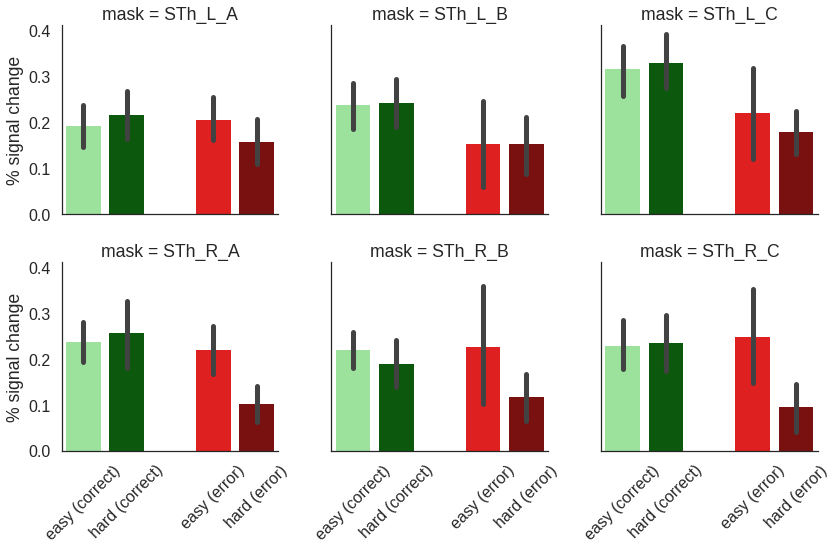

In [486]:
df_glm = pandas.DataFrame(level2_dict)
df_glm = df_glm.query('par != "constant"')
df_glm['dummy'] = 1

df_glm['% signal change'] = df_glm['value']
sns.set_palette('Set1')
sns.set_context('poster')
sns.set_style('white')

# sns.factorplot(x='dummy', y='value', hue='par', data=df_glm, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['payoff_cue (left)', 'payoff_cue (right)', 'neutral_cue','difficult_rdm', 'easy_rdm'])

tmp = df_glm.groupby(['subject_id', 'mask', 'par', 'dummy'], as_index=False).mean()
fac = sns.factorplot(x='par', y='% signal change', data=tmp, col='mask', col_wrap=3, kind='bar', ci=67, x_order=['easy (correct)', 'hard (correct)', '', 'easy (error)', 'hard (error)'], palette=['lightgreen', 'darkgreen', 'red', 'red', 'darkred'])

fac.set_xticklabels(rotation=45)
fac.set_xlabels('')

plt.tight_layout()

plt.savefig('/home/gdholla1/projects/bias/reports/figures/figure3.pdf')

In [454]:
masks = ['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']

results = []

for mask in masks:
    df = df_glm[df_glm['mask'] == mask].pivot_table(index='subject_id', values='value', columns='par')
    
    df = pandas.melt(df.reset_index(), id_vars='subject_id')
    reg = re.compile('([a-z]+) \(([a-z]+)\)')

    df = df[df.par.apply(lambda x: reg.match(x) is not None)]
    df['difficulty'] = df.par.apply(lambda x: reg.match(x).group(1))
    df['correct'] = df.par.apply(lambda x: reg.match(x).group(2))
    df['subject_id'] = df['subject_id'].astype('category')

    %R -i df

    %R library(BayesFactor)
    %R bf = anovaBF(value ~ difficulty*correct + subject_id, data = df,  whichRandom="subject_id", whichModels='top', iterations=100000)
    %R print(bf)
    %R print(1/bf)
    %R print(summary(aov(value ~ difficulty*correct + Error(subject_id/(difficulty*correct)), df)))
    
#     %R tmp = extractBF(bf)
#     %R -o tmp
    
#     results.append({'mask':mask,
#                     'BF':tmp.bf.values[0]})
    
# pandas.DataFrame(results)[['mask', 'BF']]

  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from difficulty + correct + difficulty:correct + subject_id , BF is...
[1] Omit correct:difficulty : 1.955469 ±1.07%
[2] Omit correct            : 3.456048 ±2.01%
[3] Omit difficulty         : 3.983257 ±1.39%

Against denominator:
  value ~ difficulty + correct + difficulty:correct + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                difficulty + correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                         0.5113863
                                                        denominator
numerator                                                difficulty + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                    0.2893479
                                                        denominator
numerator                                                correct + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                 0.2510508



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  2.437  0.1354               

Error: subject_id:difficulty
           Df  Sum Sq  Mean Sq F value Pr(>F)
difficulty  1 0.00305 0.003052   0.297  0.592
Residuals  18 0.18479 0.010266               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)
correct    1 0.0103 0.01026   0.213   0.65
Residuals 18 0.8673 0.04818               

Error: subject_id:difficulty:correct
                   Df  Sum Sq  Mean Sq F value Pr(>F)
difficulty:correct  1 0.02624 0.026242    2.64  0.122
Residuals          18 0.17895 0.009942               


  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from difficulty + correct + difficulty:correct + subject_id , BF is...
[1] Omit correct:difficulty : 3.215583  ±1.48%
[2] Omit correct            : 0.6334076 ±1.76%
[3] Omit difficulty         : 4.237084  ±1.22%

Against denominator:
  value ~ difficulty + correct + difficulty:correct + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                difficulty + correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                         0.3109856
                                                        denominator
numerator                                                difficulty + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                     1.578762
                                                        denominator
numerator                                                correct + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                 0.2360114



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  5.381  0.2989               

Error: subject_id:difficulty
           Df  Sum Sq  Mean Sq F value Pr(>F)
difficulty  1 0.00003 0.000032   0.004   0.95
Residuals  18 0.14501 0.008056               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)
correct    1 0.1433 0.14334   2.384   0.14
Residuals 18 1.0823 0.06013               

Error: subject_id:difficulty:correct
                   Df Sum Sq Mean Sq F value Pr(>F)
difficulty:correct  1 0.0001 0.00013   0.004  0.948
Residuals          18 0.5296 0.02942               


  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from difficulty + correct + difficulty:correct + subject_id , BF is...
[1] Omit correct:difficulty : 2.771569  ±1.61%
[2] Omit correct            : 0.2408017 ±2.87%
[3] Omit difficulty         : 3.995033  ±1.41%

Against denominator:
  value ~ difficulty + correct + difficulty:correct + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                difficulty + correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                         0.3608065
                                                        denominator
numerator                                                difficulty + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                     4.152795
                                                        denominator
numerator                                                correct + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                 0.2503108



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  4.428   0.246               

Error: subject_id:difficulty
           Df Sum Sq Mean Sq F value Pr(>F)
difficulty  1 0.0043 0.00425   0.123   0.73
Residuals  18 0.6247 0.03471               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)  
correct    1 0.2835 0.28345   6.582 0.0195 *
Residuals 18 0.7752 0.04307                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subject_id:difficulty:correct
                   Df Sum Sq Mean Sq F value Pr(>F)
difficulty:correct  1 0.0141 0.01406   0.283  0.601
Residuals          18 0.8952 0.04974               


  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from difficulty + correct + difficulty:correct + subject_id , BF is...
[1] Omit correct:difficulty : 0.9883063 ±1.46%
[2] Omit correct            : 0.5566166 ±3.74%
[3] Omit difficulty         : 2.191397  ±1.37%

Against denominator:
  value ~ difficulty + correct + difficulty:correct + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                difficulty + correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                          1.011832
                                                        denominator
numerator                                                difficulty + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                     1.796569
                                                        denominator
numerator                                                correct + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                   0.45633



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  2.949  0.1638               

Error: subject_id:difficulty
           Df  Sum Sq Mean Sq F value Pr(>F)
difficulty  1 0.04641 0.04641   2.765  0.114
Residuals  18 0.30218 0.01679               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)
correct    1 0.1436 0.14364   2.794  0.112
Residuals 18 0.9254 0.05141               

Error: subject_id:difficulty:correct
                   Df Sum Sq Mean Sq F value Pr(>F)  
difficulty:correct  1 0.0888 0.08877   4.386 0.0507 .
Residuals          18 0.3643 0.02024                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from difficulty + correct + difficulty:correct + subject_id , BF is...
[1] Omit correct:difficulty : 2.75595  ±2.29%
[2] Omit correct            : 4.094076 ±7.37%
[3] Omit difficulty         : 2.390074 ±2.64%

Against denominator:
  value ~ difficulty + correct + difficulty:correct + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                difficulty + correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                         0.3628513
                                                        denominator
numerator                                                difficulty + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                    0.2442554
                                                        denominator
numerator                                                correct + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                  0.418397



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  5.286  0.2937               

Error: subject_id:difficulty
           Df Sum Sq Mean Sq F value Pr(>F)
difficulty  1 0.0944 0.09438   1.771    0.2
Residuals  18 0.9590 0.05328               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)
correct    1  0.020 0.02003   0.181  0.676
Residuals 18  1.995 0.11081               

Error: subject_id:difficulty:correct
                   Df Sum Sq Mean Sq F value Pr(>F)
difficulty:correct  1 0.0281 0.02813   0.545   0.47
Residuals          18 0.9288 0.05160               


  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from difficulty + correct + difficulty:correct + subject_id , BF is...
[1] Omit correct:difficulty : 1.68184  ±2.24%
[2] Omit correct            : 2.75631  ±2.3%
[3] Omit difficulty         : 2.369138 ±3.07%

Against denominator:
  value ~ difficulty + correct + difficulty:correct + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                difficulty + correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                         0.5945867
                                                        denominator
numerator                                                difficulty + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                    0.3628039
                                                        denominator
numerator                                                correct + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                 0.4220944



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  3.573  0.1985               

Error: subject_id:difficulty
           Df Sum Sq Mean Sq F value Pr(>F)
difficulty  1 0.1019 0.10194   1.142  0.299
Residuals  18 1.6071 0.08928               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)
correct    1 0.0729 0.07286   0.867  0.364
Residuals 18 1.5134 0.08408               

Error: subject_id:difficulty:correct
                   Df Sum Sq Mean Sq F value Pr(>F)
difficulty:correct  1 0.1203 0.12029   1.901  0.185
Residuals          18 1.1387 0.06326               


In [473]:
df_glm

df = df_glm.copy()

# df = pandas.melt(df.reset_index(), id_vars='subject_id')
reg = re.compile('([a-z]+) \(([a-z]+)\)')

df = df[df.par.apply(lambda x: reg.match(x) is not None)]
df['difficulty'] = df.par.apply(lambda x: reg.match(x).group(1))
df['correct'] = df.par.apply(lambda x: reg.match(x).group(2))
df['subject_id'] = df['subject_id'].astype('category')

tmp_l = df[np.in1d(df['mask'], ['STh_L_A', 'STh_L_B', 'STh_L_C'])].groupby(['subject_id', 'correct', 'mask'], as_index=False).mean()

%R -i tmp_l
%R library(BayesFactor)
%R bf = anovaBF(value ~ mask*correct + subject_id, data = tmp_l,  whichRandom="subject_id", whichModels='top', iterations=100000)
%R print(bf)
%R print(1/bf)
%R print(summary(aov(value ~ mask*correct + Error(subject_id/(mask*correct)), tmp_l)))

tmp_r = df[np.in1d(df['mask'], ['STh_R_A', 'STh_R_B', 'STh_R_C'])].groupby(['subject_id', 'correct', 'mask'], as_index=False).mean()

%R -i tmp_r
%R library(BayesFactor)
%R bf = anovaBF(value ~ mask*correct + subject_id, data = tmp_r,  whichRandom="subject_id", whichModels='top', iterations=100000)
%R print(bf)
%R print(1/bf)
%R print(summary(aov(value ~ mask*correct + Error(subject_id/(mask*correct)), tmp_r)))

tmp.head()

  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from correct + mask + correct:mask + subject_id , BF is...
[1] Omit correct:mask : 4.749574  ±1.01%
[2] Omit mask         : 4.027488  ±1.08%
[3] Omit correct      : 0.8353629 ±1.48%

Against denominator:
  value ~ correct + mask + correct:mask + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                            denominator
numerator                                    correct + mask + subject_id
  correct + mask + correct:mask + subject_id                   0.2105452
                                            denominator
numerator                                    correct + correct:mask + subject_id
  correct + mask + correct:mask + subject_id                           0.2482938
                                            denominator
numerator                                    mask + correct:mask + subject_id
  correct + mask + correct:mask + subject_id                         1.197085



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  3.558  0.1977               

Error: subject_id:mask
          Df Sum Sq Mean Sq F value Pr(>F)
mask       2 0.1136 0.05678   0.797  0.458
Residuals 36 2.5647 0.07124               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)  
correct    1 0.1708 0.17080   3.027  0.099 .
Residuals 18 1.0157 0.05643                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subject_id:mask:correct
             Df Sum Sq  Mean Sq F value Pr(>F)  
mask:correct  2 0.0477 0.023866   2.478 0.0981 .
Residuals    36 0.3467 0.009632                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from correct + mask + correct:mask + subject_id , BF is...
[1] Omit correct:mask : 6.617851 ±1.16%
[2] Omit mask         : 11.78133 ±1.04%
[3] Omit correct      : 1.887015 ±1.28%

Against denominator:
  value ~ correct + mask + correct:mask + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                            denominator
numerator                                    correct + mask + subject_id
  correct + mask + correct:mask + subject_id                   0.1511064
                                            denominator
numerator                                    correct + correct:mask + subject_id
  correct + mask + correct:mask + subject_id                          0.08488006
                                            denominator
numerator                                    mask + correct:mask + subject_id
  correct + mask + correct:mask + subject_id                        0.5299374



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  3.746  0.2081               

Error: subject_id:mask
          Df Sum Sq Mean Sq F value Pr(>F)
mask       2 0.0054 0.00268   0.045  0.956
Residuals 36 2.1582 0.05995               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)
correct    1 0.1041  0.1041   1.011  0.328
Residuals 18 1.8533  0.1030               

Error: subject_id:mask:correct
             Df Sum Sq  Mean Sq F value Pr(>F)
mask:correct  2 0.0141 0.007064     0.7  0.503
Residuals    36 0.3634 0.010095               


correct              correct     error
subject_id mask                       
1          STh_L_A -0.268671 -0.260130
           STh_L_B -0.151204  0.002393
           STh_L_C -0.020658  0.150252
           STh_R_A -0.036892 -0.095763
           STh_R_B  0.040324  0.020512

## Model 2

In [556]:


import itertools
import pyfir
from nipy.modalities.fmri import design_matrix, experimental_paradigm
import statsmodels.api as sm

level2_dict = []
adj_r = []
# pars = ['neutral_cue', 'left_cue', 'right_cue', 'neutral_easy_correct', 'valid_easy_correct', 'invalid_easy_correct', 'neutral_hard_correct', 'valid_hard_correct', 'invalid_hard_correct', 'easy_error', 'hard_error',]
# pars = 

for subject_id in np.arange(1, 20):
    for run in [1,2,3]:

        try:
            onsets_dict = get_onsets(subject_id, run, 'model2', shift=-3)
            pars = onsets_dict.keys()

            conditions = []
            onsets = []
            for key in onsets_dict.keys():
                conditions += [key] * len(onsets_dict[key])
                onsets += onsets_dict[key]

            paradigm =  experimental_paradigm.BlockParadigm(con_id=conditions, 
                                                            onset=onsets,
                                                            duration=[[1.]] * len(conditions))
            tr = 3.0
            frametimes = np.linspace(0, 387 * tr, 387)
            hrf_model = 'Canonical with Derivative'

            X, names= design_matrix.dmtx_light(frametimes, paradigm, hrf_model=hrf_model, drift_model='polynomial', fir_delays=np.arange(11), drift_order=3)

            X /= X.max(0)
            X = pandas.DataFrame(X, columns=names)

            for i, mask in enumerate(['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']):
                signal = get_signal(subject_id,  run, mask)
                r = sm.GLSAR(signal, X).iterative_fit()

                adj_r.append({'subject_id':subject_id, 'mask':mask, 'r2_adj':r.rsquared_adj, 'r2':r.rsquared, 'run':run})

                for par in pars:
                    level2_dict.append({'value':r.params[par],
                                        'par':par,
                                        'subject_id':subject_id,
                                        'mask':mask,
                                        'run':run})
        except Exception as e:
            print 'Error: %s/%s/%s' %  (subject_id, mask, e)

Error: 6/STh_R_C/all the input arrays must have same number of dimensions
Error: 15/STh_L_A/'error (incongruent)'


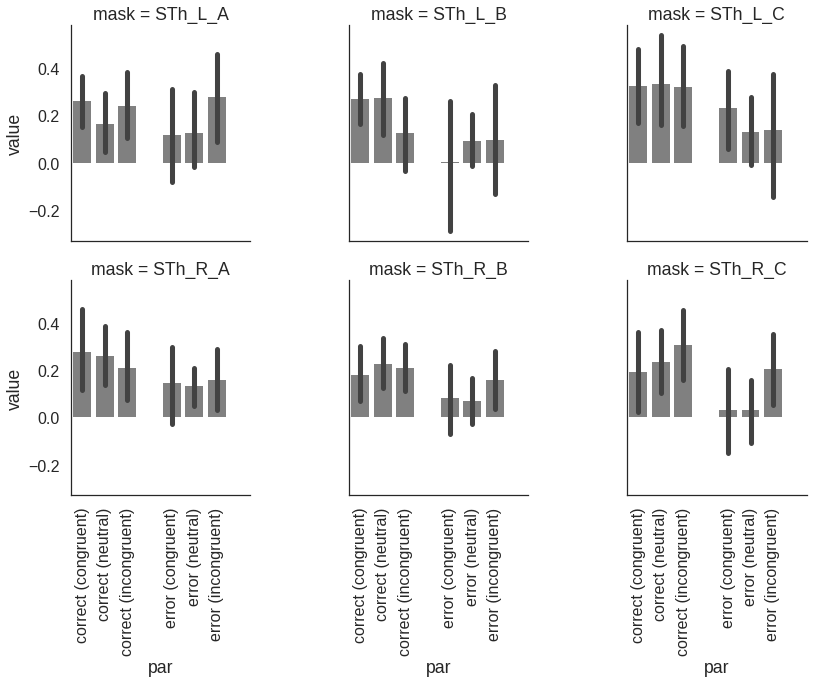

In [557]:
df_glm = pandas.DataFrame(level2_dict)
df_glm = df_glm.query('par != "constant"')
df_glm['dummy'] = 1

df_glm['% signal change'] = df_glm['value']
sns.set_palette('Set1')
sns.set_context('poster')
sns.set_style('white')

# sns.factorplot(x='dummy', y='value', hue='par', data=df_glm, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['payoff_cue (left)', 'payoff_cue (right)', 'neutral_cue','difficult_rdm', 'easy_rdm'])

tmp = df_glm.groupby(['subject_id', 'mask', 'par', 'dummy'], as_index=False).mean()
# sns.factorplot(x='dummy', y='value', hue='par', data=tmp, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['correct (congruent)', 'correct (neutral)', 'correct (incongruent)', '', 'error (congruent)', 'error (neutral)', 'error (incongruent)', ''])
fac = sns.factorplot(x='par', y='value', data=tmp, col='mask', col_wrap=3, kind='bar', ci=95, x_order=['correct (congruent)', 'correct (neutral)', 'correct (incongruent)', '', 'error (congruent)', 'error (neutral)', 'error (incongruent)', ''], palette=['gray'])
fac.set_xticklabels(rotation=90)



In [559]:
masks = ['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']

results = []

for mask in masks:
    df = df_glm[df_glm['mask'] == mask].pivot_table(index='subject_id', values='value', columns='par')
    
    df = pandas.melt(df.reset_index(), id_vars='subject_id')
    reg = re.compile('([a-z]+) \(([a-z]+)\)')

    df = df[df.par.apply(lambda x: reg.match(x) is not None)]
    df['correct'] = df.par.apply(lambda x: reg.match(x).group(1))
    df['congruency'] = df.par.apply(lambda x: reg.match(x).group(2))
    df['subject_id'] = df['subject_id'].astype('category')

    %R -i df

    %R library(BayesFactor)
    %R bf = anovaBF(value ~ congruency*correct + subject_id, data = df,  whichRandom="subject_id", whichModels='top')
    %R print(bf)
    %R print(1/bf)
    %R print(summary(aov(value ~ congruency * correct + Error(subject_id/(congruency * correct)), df)))
    %R tmp = extractBF(bf)
    %R -o tmp
    
#     results.append({'mask':mask,
#                     'BF':tmp.bf.values[0]})
    
# pandas.DataFrame(results)[['mask', 'BF']]

  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from correct + congruency + correct:congruency + subject_id , BF is...
[1] Omit congruency:correct : 3.738037 ±2.39%
[2] Omit congruency         : 4.097671 ±2.6%
[3] Omit correct            : 3.861902 ±4.19%

Against denominator:
  value ~ correct + congruency + correct:congruency + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                correct + congruency + subject_id
  correct + congruency + correct:congruency + subject_id                         0.2675201
                                                        denominator
numerator                                                correct + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                 0.2440411
                                                        denominator
numerator                                                congruency + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                    0.2589397



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  5.028  0.2793               

Error: subject_id:congruency
           Df Sum Sq Mean Sq F value Pr(>F)
congruency  2  0.247  0.1233   0.911  0.411
Residuals  36  4.874  0.1354               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)
correct    1 0.0661 0.06609   1.193  0.289
Residuals 18 0.9972 0.05540               

Error: subject_id:congruency:correct
                   Df Sum Sq Mean Sq F value Pr(>F)
congruency:correct  2 0.1599 0.07996   1.082   0.35
Residuals          36 2.6602 0.07389               


  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from correct + congruency + correct:congruency + subject_id , BF is...
[1] Omit congruency:correct : 2.563299  ±3.33%
[2] Omit congruency         : 7.825623  ±3.43%
[3] Omit correct            : 0.2469223 ±4.34%

Against denominator:
  value ~ correct + congruency + correct:congruency + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                correct + congruency + subject_id
  correct + congruency + correct:congruency + subject_id                         0.3901222
                                                        denominator
numerator                                                correct + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                 0.1277853
                                                        denominator
numerator                                                congruency + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                     4.049856



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  9.167  0.5093               

Error: subject_id:congruency
           Df Sum Sq Mean Sq F value Pr(>F)
congruency  2  0.103 0.05167   0.414  0.664
Residuals  36  4.489 0.12470               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)  
correct    1  0.711  0.7110    4.54 0.0472 *
Residuals 18  2.819  0.1566                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subject_id:congruency:correct
                   Df Sum Sq Mean Sq F value Pr(>F)
congruency:correct  2 0.2814 0.14071   2.147  0.131
Residuals          36 2.3588 0.06552               


  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from correct + congruency + correct:congruency + subject_id , BF is...
[1] Omit congruency:correct : 6.24601   ±2.49%
[2] Omit congruency         : 10.51734  ±2.25%
[3] Omit correct            : 0.5686777 ±4.92%

Against denominator:
  value ~ correct + congruency + correct:congruency + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                correct + congruency + subject_id
  correct + congruency + correct:congruency + subject_id                         0.1601022
                                                        denominator
numerator                                                correct + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                 0.0950811
                                                        denominator
numerator                                                congruency + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                     1.758465



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  5.759  0.3199               

Error: subject_id:congruency
           Df Sum Sq Mean Sq F value Pr(>F)
congruency  2  0.057 0.02833   0.109  0.897
Residuals  36  9.397 0.26102               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)  
correct    1 0.7203  0.7203   5.582 0.0296 *
Residuals 18 2.3228  0.1290                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subject_id:congruency:correct
                   Df Sum Sq Mean Sq F value Pr(>F)
congruency:correct  2 0.0639 0.03195   0.545  0.585
Residuals          36 2.1110 0.05864               


  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from correct + congruency + correct:congruency + subject_id , BF is...
[1] Omit congruency:correct : 5.6584    ±3.66%
[2] Omit congruency         : 10.91799  ±2.4%
[3] Omit correct            : 0.5866003 ±2.6%

Against denominator:
  value ~ correct + congruency + correct:congruency + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                correct + congruency + subject_id
  correct + congruency + correct:congruency + subject_id                         0.1767284
                                                        denominator
numerator                                                correct + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                0.09159192
                                                        denominator
numerator                                                congruency + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                     1.704738



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  5.044  0.2802               

Error: subject_id:congruency
           Df Sum Sq Mean Sq F value Pr(>F)
congruency  2  0.013 0.00649   0.077  0.926
Residuals  36  3.035 0.08430               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)  
correct    1 0.2924 0.29244   3.406 0.0815 .
Residuals 18 1.5456 0.08587                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subject_id:congruency:correct
                   Df Sum Sq Mean Sq F value Pr(>F)
congruency:correct  2 0.0392 0.01960   0.654  0.526
Residuals          36 1.0792 0.02998               


  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from correct + congruency + correct:congruency + subject_id , BF is...
[1] Omit congruency:correct : 4.794983  ±2.48%
[2] Omit congruency         : 7.350224  ±2.25%
[3] Omit correct            : 0.2896184 ±2.19%

Against denominator:
  value ~ correct + congruency + correct:congruency + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                correct + congruency + subject_id
  correct + congruency + correct:congruency + subject_id                         0.2085513
                                                        denominator
numerator                                                correct + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                 0.1360503
                                                        denominator
numerator                                                congruency + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                     3.452819



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  3.693  0.2052               

Error: subject_id:congruency
           Df Sum Sq Mean Sq F value Pr(>F)
congruency  2 0.0577 0.02886   0.594  0.558
Residuals  36 1.7498 0.04861               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)  
correct    1 0.2896 0.28964    4.17 0.0561 .
Residuals 18 1.2503 0.06946                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subject_id:congruency:correct
                   Df Sum Sq Mean Sq F value Pr(>F)
congruency:correct  2 0.0548 0.02741   0.853  0.435
Residuals          36 1.1566 0.03213               


  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from correct + congruency + correct:congruency + subject_id , BF is...
[1] Omit congruency:correct : 5.466331  ±5.32%
[2] Omit congruency         : 1.25216   ±5.15%
[3] Omit correct            : 0.1206856 ±5.15%

Against denominator:
  value ~ correct + congruency + correct:congruency + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                correct + congruency + subject_id
  correct + congruency + correct:congruency + subject_id                         0.1829381
                                                        denominator
numerator                                                correct + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                 0.7986202
                                                        denominator
numerator                                                congruency + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                     8.285991



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  5.574  0.3096               

Error: subject_id:congruency
           Df Sum Sq Mean Sq F value Pr(>F)
congruency  2  0.449  0.2243    1.99  0.151
Residuals  36  4.057  0.1127               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)  
correct    1 0.6964  0.6964   6.921  0.017 *
Residuals 18 1.8111  0.1006                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subject_id:congruency:correct
                   Df Sum Sq Mean Sq F value Pr(>F)
congruency:correct  2 0.0492 0.02461    0.45  0.641
Residuals          36 1.9704 0.05473               


# Model 3

In [560]:
import itertools
import pyfir
from nipy.modalities.fmri import design_matrix, experimental_paradigm
import statsmodels.api as sm

level2_dict = []
adj_r = []
# pars = ['neutral_cue', 'left_cue', 'right_cue', 'neutral_easy_correct', 'valid_easy_correct', 'invalid_easy_correct', 'neutral_hard_correct', 'valid_hard_correct', 'invalid_hard_correct', 'easy_error', 'hard_error',]
# pars = 

for subject_id in np.arange(1, 20):
    for run in [1,2,3]:

        try:
            onsets_dict = get_onsets(subject_id, run, 'model3', shift=-3)
            pars = onsets_dict.keys()

            conditions = []
            onsets = []
            for key in onsets_dict.keys():
                conditions += [key] * len(onsets_dict[key])
                onsets += onsets_dict[key]

            paradigm =  experimental_paradigm.BlockParadigm(con_id=conditions, 
                                                            onset=onsets,
                                                            duration=[[1.]] * len(conditions))
            tr = 3.0
            frametimes = np.linspace(0, 387 * tr, 387)
            hrf_model = 'Canonical with Derivative'

            X, names= design_matrix.dmtx_light(frametimes, paradigm, hrf_model=hrf_model, drift_model='polynomial', fir_delays=np.arange(11), drift_order=3)

            X /= X.max(0)
            X = pandas.DataFrame(X, columns=names)

            for i, mask in enumerate(['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']):
                signal = get_signal(subject_id,  run, mask)
                r = sm.GLSAR(signal, X).iterative_fit()

                adj_r.append({'subject_id':subject_id, 'mask':mask, 'r2_adj':r.rsquared_adj, 'r2':r.rsquared, 'run':run})

                for par in pars:
                    level2_dict.append({'value':r.params[par],
                                        'par':par,
                                        'subject_id':subject_id,
                                        'mask':mask,
                                        'run':run})
        except Exception as e:
            print 'Error: %s/%s/%s' %  (subject_id, mask, e)

Error: 6/STh_R_C/all the input arrays must have same number of dimensions


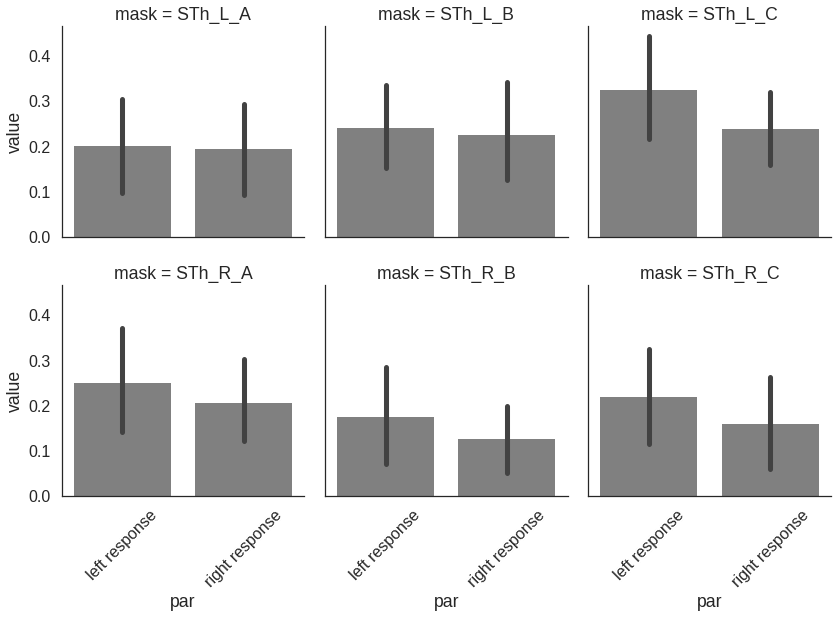

In [561]:
df_glm = pandas.DataFrame(level2_dict)
df_glm = df_glm.query('par != "constant"')
df_glm['dummy'] = 1

df_glm['% signal change'] = df_glm['value']
sns.set_palette('Set1')
sns.set_context('poster')
sns.set_style('white')

# sns.factorplot(x='dummy', y='value', hue='par', data=df_glm, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['payoff_cue (left)', 'payoff_cue (right)', 'neutral_cue','difficult_rdm', 'easy_rdm'])

tmp = df_glm.groupby(['subject_id', 'mask', 'par', 'dummy'], as_index=False).mean()
# sns.factorplot(x='dummy', y='value', hue='par', data=tmp, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['correct (congruent)', 'correct (neutral)', 'correct (incongruent)', '', 'error (congruent)', 'error (neutral)', 'error (incongruent)', ''])
fac = sns.factorplot(x='par', y='value', data=tmp, col='mask', col_wrap=3, kind='bar', ci=95, x_order=['left response', 'right response'], palette=['gray'])
fac.set_xticklabels(rotation=45)



In [562]:
masks = ['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']

results = []

for mask in masks:
    df = df_glm[df_glm['mask'] == mask].pivot_table(index='subject_id', values='value', columns='par')
    
    df = pandas.melt(df.reset_index(), id_vars='subject_id')

    df = df[df.par.apply(lambda x: x.split(' ')[-1] == 'response')]
    
    df_mask = df.pivot_table(index='subject_id', columns='par', values='value')

    %R -i df_mask
    %R library(BayesFactor)
    %R bf = ttestBF(df_mask$left.response - df_mask$right.response)
    %R tmp = extractBF(bf)
    %R -o tmp
    
    t, p = sp.stats.ttest_rel(df_mask['left response'], df_mask['right response'])
    
    results.append({'mask':mask,
                    'BF':tmp.bf.values[0],
                    't':t,
                    'p':p})
    
np.round(pandas.DataFrame(results)[['mask', 'BF', 't', 'p']], 2).T    
    

,0,1,2,3,4,5
mask,STh_L_A,STh_L_B,STh_L_C,STh_R_A,STh_R_B,STh_R_C
BF,0.24,0.25,0.83,0.46,0.45,0.68
t,0.11,0.28,1.73,1.24,1.22,1.58
p,0.91,0.78,0.1,0.23,0.24,0.13


# Model 0

In [563]:
import itertools
import pyfir
from nipy.modalities.fmri import design_matrix, experimental_paradigm
import statsmodels.api as sm

level2_dict = []
adj_r = []
# pars = ['neutral_cue', 'left_cue', 'right_cue', 'neutral_easy_correct', 'valid_easy_correct', 'invalid_easy_correct', 'neutral_hard_correct', 'valid_hard_correct', 'invalid_hard_correct', 'easy_error', 'hard_error',]
# pars = 

for subject_id in np.arange(1, 20):
    for run in [1,2,3]:

        try:
            onsets_dict = get_onsets(subject_id, run, 'model0', shift=-3)
            pars = onsets_dict.keys()

            conditions = []
            onsets = []
            for key in onsets_dict.keys():
                conditions += [key] * len(onsets_dict[key])
                onsets += onsets_dict[key]

            paradigm =  experimental_paradigm.BlockParadigm(con_id=conditions, 
                                                            onset=onsets,
                                                            duration=[[1.]] * len(conditions))
            tr = 3.0
            frametimes = np.linspace(0, 387 * tr, 387)
            hrf_model = 'Canonical with Derivative'

            X, names= design_matrix.dmtx_light(frametimes, paradigm, hrf_model=hrf_model, drift_model='polynomial', fir_delays=np.arange(11), drift_order=3)

            X /= X.max(0)
            X = pandas.DataFrame(X, columns=names)

            for i, mask in enumerate(['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']):
                signal = get_signal(subject_id,  run, mask)
                r = sm.GLSAR(signal, X).iterative_fit()

                adj_r.append({'subject_id':subject_id, 'mask':mask, 'r2_adj':r.rsquared_adj, 'r2':r.rsquared, 'run':run})

                for par in pars:
                    level2_dict.append({'value':r.params[par],
                                        'par':par,
                                        'p':r.pvalues[par],
                                        'subject_id':subject_id,
                                        'mask':mask,
                                        'run':run})
        except Exception as e:
            print 'Error: %s/%s/%s' %  (subject_id, mask, e)

Error: 6/STh_R_C/all the input arrays must have same number of dimensions


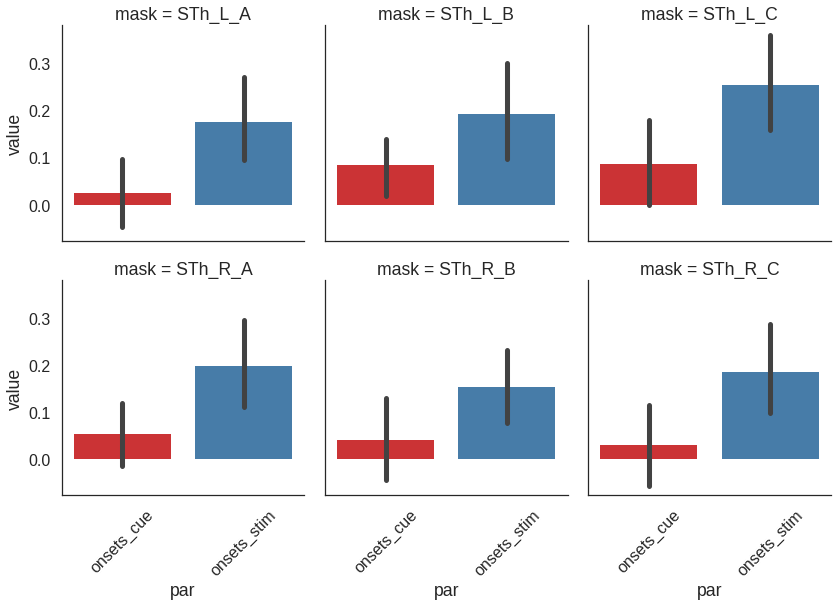

In [564]:
df_glm = pandas.DataFrame(level2_dict)
df_glm = df_glm.query('par != "constant"')
df_glm['dummy'] = 1

df_glm['% signal change'] = df_glm['value']
sns.set_palette('Set1')
sns.set_context('poster')
sns.set_style('white')

# sns.factorplot(x='dummy', y='value', hue='par', data=df_glm, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['payoff_cue (left)', 'payoff_cue (right)', 'neutral_cue','difficult_rdm', 'easy_rdm'])

tmp = df_glm.groupby(['subject_id', 'mask', 'par', 'dummy'], as_index=False).mean()
# sns.factorplot(x='dummy', y='value', hue='par', data=tmp, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['correct (congruent)', 'correct (neutral)', 'correct (incongruent)', '', 'error (congruent)', 'error (neutral)', 'error (incongruent)', ''])
fac = sns.factorplot(x='par', y='value', data=tmp, col='mask', col_wrap=3, kind='bar', ci=95)
fac.set_xticklabels(rotation=45)

In [565]:
df_glm['significant'] = df_glm.p < 0.05

In [566]:
df_glm.groupby(['mask', 'par']).significant.mean()

mask     par        
STh_L_A  onsets_cue     0.035714
         onsets_stim    0.160714
STh_L_B  onsets_cue     0.071429
         onsets_stim    0.125000
STh_L_C  onsets_cue     0.017857
         onsets_stim    0.214286
STh_R_A  onsets_cue     0.071429
         onsets_stim    0.125000
STh_R_B  onsets_cue     0.017857
         onsets_stim    0.089286
STh_R_C  onsets_cue     0.035714
         onsets_stim    0.125000
Name: significant, dtype: float64

## Stimulus

In [568]:
masks = ['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']

results = []

for mask in masks:
    df_mask = df_glm[df_glm['mask'] == mask].pivot_table(index='subject_id', values='value', columns='par')

    %R -i df_mask
    %R library(BayesFactor)
    %R bf = ttestBF(df_mask$onsets_stim)
    %R tmp = extractBF(bf)
    %R -o tmp
    
    t, p = sp.stats.ttest_1samp(df_mask['onsets_stim'], 0)
    
    results.append({'mask':mask,
                    'BF':tmp.bf.values[0],
                    't':t,
                    'p':p})
    
np.round(pandas.DataFrame(results)[['mask', 'BF', 't', 'p']], 2).T    
    

,0,1,2,3,4,5
mask,STh_L_A,STh_L_B,STh_L_C,STh_R_A,STh_R_B,STh_R_C
BF,33.43,13.8,212.28,51.04,25.28,23.71
t,3.87,3.41,4.82,4.09,3.72,3.69
p,0,0,0,0,0,0


## Cue

,BF,mask,p,t
0,0.238833,STh_L_A,0.912309,0.111685
1,0.246075,STh_L_B,0.782094,0.280763
2,0.826730,STh_L_C,0.101241,1.727257
3,0.463163,STh_R_A,0.230309,1.241630
4,0.454190,STh_R_B,0.237256,1.222580
5,0.679560,STh_R_C,0.132400,1.576167


In [511]:

masks = ['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']

results = []

for mask in masks:
    df_mask = df_glm[df_glm['mask'] == mask].pivot_table(index='subject_id', values='value', columns='par')

    %R -i df_mask
    %R library(BayesFactor)
    %R bf = ttestBF(df_mask$onsets_cue)
    %R tmp = extractBF(bf)
    %R -o tmp
    
    t, p = sp.stats.ttest_1samp(df_mask['onsets_cue'], 0)
    
    results.append({'mask':mask,
                    'BF':tmp.bf.values[0],
                    't':t,
                    'p':p})
    
np.round(pandas.DataFrame(results)[['mask', 'BF', 't', 'p']], 2).T    
    

,0,1,2,3,4,5
mask,STh_L_A,STh_L_B,STh_L_C,STh_R_A,STh_R_B,STh_R_C
BF,0.28,3.76,0.91,0.62,0.33,0.29
t,0.63,2.7,1.8,1.5,0.85,0.66
p,0.54,0.01,0.09,0.15,0.4,0.52


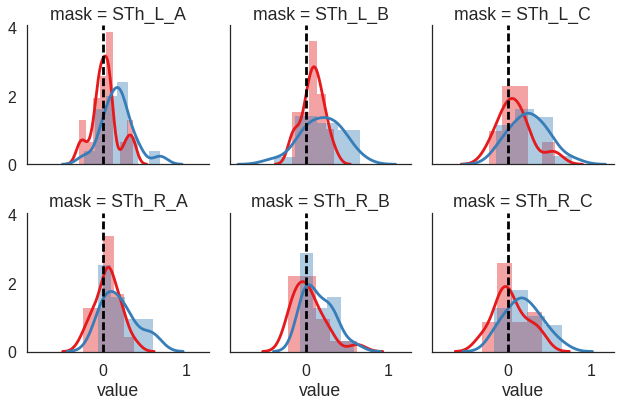

In [533]:
fac = sns.FacetGrid(df_glm.groupby(['subject_id', 'par', 'mask'], as_index=False).mean(), col='mask', col_wrap=3, hue='par')

fac.map(sns.distplot, 'value')
for ax in fac.axes.ravel():
    ax.axvline(0, c='k', ls='--')

In [570]:
tmp = df_glm.pivot_table(index=['mask', 'subject_id'], columns=['par'], values='value').reset_index()
tmp['subject_id'] = tmp['subject_id'].astype('category')

tmp_l = tmp[np.in1d(tmp['mask'], ['STh_L_A', 'STh_L_B', 'STh_L_C'])]
%R -i tmp_l
%R bf = anovaBF(onsets_cue ~ mask + subject_id, data =tmp_l,  whichRandom="subject_id", whichModels='ID', iterations=100000)
%R print(bf)

tmp_l = tmp[np.in1d(tmp['mask'], ['STh_L_A', 'STh_L_B', 'STh_L_C'])]
%R -i tmp_l
%R bf = anovaBF(onsets_stim ~ mask + subject_id, data =tmp_l,  whichRandom="subject_id", iterations=100000)
%R print(bf)

tmp_r = tmp[np.in1d(tmp['mask'], ['STh_R_A', 'STh_R_B', 'STh_R_C'])]
%R -i tmp_r
%R bf = anovaBF(onsets_cue ~ mask + subject_id, data =tmp_r,  whichRandom="subject_id", whichModels='all', iterations=100000)
%R print(bf)

tmp_r = tmp[np.in1d(tmp['mask'], ['STh_R_A', 'STh_R_B', 'STh_R_C'])]
%R -i tmp_r
%R bf = anovaBF(onsets_stim ~ mask + subject_id, data =tmp_r,  whichRandom="subject_id", whichModels='all', iterations=100000)
%R print(bf)

  |======================================================================| 100%


Bayes factor analysis
--------------
[1] mask + subject_id : 0.4860592 ±0.33%

Against denominator:
  onsets_cue ~ subject_id 
---
Bayes factor type: BFlinearModel, JZS



  |======================================================================| 100%


Bayes factor analysis
--------------
[1] mask + subject_id : 0.2826392 ±0.25%

Against denominator:
  onsets_stim ~ subject_id 
---
Bayes factor type: BFlinearModel, JZS



  |======================================================================| 100%


Bayes factor analysis
--------------
[1] mask + subject_id : 0.1565372 ±0.4%

Against denominator:
  onsets_cue ~ subject_id 
---
Bayes factor type: BFlinearModel, JZS



  |======================================================================| 100%


Bayes factor analysis
--------------
[1] mask + subject_id : 0.1853174 ±0.46%

Against denominator:
  onsets_stim ~ subject_id 
---
Bayes factor type: BFlinearModel, JZS



In [554]:
tmp_l = tmp_l.pivot_table(index='subject_id')

%R -i tmp_l
%R bf = ttestBF(tmp_l$onsets_cue)
%R print(bf)
%R bf = ttestBF(tmp_l$onsets_stim)
%R print(bf)

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 1.144898 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS



Bayes factor analysis
--------------
[1] Alt., r=0.707 : 712.9012 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS



In [555]:
tmp_r = tmp_r.pivot_table(index='subject_id')

%R -i tmp_r
%R bf = ttestBF(tmp_r$onsets_cue)
%R print(bf)
%R bf = ttestBF(tmp_r$onsets_stim)
%R print(bf)

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 0.4092498 ±0.01%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS



Bayes factor analysis
--------------
[1] Alt., r=0.707 : 262.0966 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS

